In [102]:
#Library impoting part

import pandas as pd
import matplotlib.pyplot as plt
import requests
import seaborn as sns
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [103]:
#Data Scraping part

file_path = "/Users/hakanozgul/Desktop/CS_210/Term_Project/StreamingHistory0.json"
df = pd.read_json(file_path)

In [104]:
def calculate_hours_and_top_songs(df, start_date, end_date):
    """
    Calculate the total hours listened and retrieve details of the most listened songs within the specified date range.

    Parameters:
    - df (DataFrame): The input DataFrame containing song data.
    - start_date (str): The starting date in the format 'YYYY-MM-DD'.
    - end_date (str): The ending date in the format 'YYYY-MM-DD'.

    Returns:
    - tuple: A tuple containing the total hours listened and details of the most listened songs (DataFrame).
    """
    # Convert 'endTime' to datetime
    df['endTime'] = pd.to_datetime(df['endTime'])
    
    # Filter the DataFrame for songs played between the specified start and end dates
    filtered_df = df[(df['endTime'] >= start_date) & (df['endTime'] < end_date)]

    # Group by 'artistName', 'trackName' and aggregate 'msPlayed' by sum
    grouped_df = filtered_df.groupby(['artistName', 'trackName'], as_index=False)['msPlayed'].sum()

    # Sort the DataFrame in descending order based on 'msPlayed'
    grouped_df = grouped_df.sort_values(by='msPlayed', ascending=False)

    # Sum the 'msPlayed' column for total playtime
    total_playtime = grouped_df['msPlayed'].sum()

    # Convert milliseconds to hours
    total_hours = total_playtime / (1000 * 60 * 60)

    # Retrieve details of the most listened songs
    most_listened_songs = grouped_df.head(5)  # You can adjust the number as needed

    return total_hours, most_listened_songs



#This function takes song name as a parameter and returns the genre of that song
def get_song_genre(song_name):
    # Authenticate with Spotify API
    client_credentials_manager = SpotifyClientCredentials(client_id="07956199828f4f1d9c1888239f7b9cab", client_secret="22e5e2ba01574c06999e5835237fd23f")
    sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
    # Search for the song
    results = sp.search(q=song_name, type='track', limit=1)

    # Check if there are any search results
    if results['tracks']['items']:
        track = results['tracks']['items'][0]
        track_id = track['id']

        # Get the track details
        track_details = sp.track(track_id)

        # Check if 'artists' key exists and has at least one artist
        if 'artists' in track_details and track_details['artists']:
            # Get the first artist's details
            artist_id = track_details['artists'][0]['id']
            artist_details = sp.artist(artist_id)

            # Check if 'genres' key exists for the artist
            genres = artist_details.get('genres', [])
            return genres
        else:
            print(f"No artist or genres information found for the song: {song_name}")
            return None

    else:
        print(f"No results found for the song: {song_name}")
        return None
    

def get_songs_and_genres_between_times(df, start_date, end_date):
    """
    Retrieve details of all songs listened and count how many times each genre was listened within the specified date range.

    Parameters:
    - df (DataFrame): The input DataFrame containing song data.
    - start_date (str): The starting date in the format 'YYYY-MM-DD'.
    - end_date (str): The ending date in the format 'YYYY-MM-DD'.

    Returns:
    - DataFrame: A DataFrame containing counts of how many times each genre was listened.
    """
    # Convert 'endTime' to datetime
    df['endTime'] = pd.to_datetime(df['endTime'])
    
    # Filter the DataFrame for songs played between the specified start and end dates
    filtered_df = df[(df['endTime'] >= start_date) & (df['endTime'] < end_date)]

    # Create a new DataFrame to store song details and genres
    songs_and_genres_df = pd.DataFrame(columns=['artistName', 'trackName', 'genres'])

    # Keep track of seen songs to avoid duplicates
    seen_songs = set()

    # Iterate through the filtered DataFrame and fetch genres for each song
    for index, row in filtered_df.iterrows():
        artist_name = row['artistName']
        track_name = row['trackName']
        song_key = f"{artist_name} {track_name}"

        # Check if the song is already in the seen_songs set
        if song_key not in seen_songs:
            # Get the genres for the current song using the get_song_genre function
            genres = get_song_genre(song_key)

            # Append the details to the new DataFrame
            song_df = pd.DataFrame({'artistName': [artist_name], 'trackName': [track_name], 'genres': [genres]})
            songs_and_genres_df = pd.concat([songs_and_genres_df, song_df], ignore_index=True)

            # Add the song to the seen_songs set
            seen_songs.add(song_key)

    # Count the occurrences of each genre
    genre_counts = songs_and_genres_df['genres'].explode().value_counts().reset_index()
    genre_counts.columns = ['genre', 'count']

    return genre_counts


In [105]:
#the day before first midterm exam 
total_hours_midterm1,topsongs_midterm1 = calculate_hours_and_top_songs(df,"2023-11-16","2023-11-17")

#the day before another midterm exam
total_hours_midterm2,topsongs_midterm2 = calculate_hours_and_top_songs(df,"2023-11-19","2023-11-20")

#the day before another midterm exam
total_hours_midterm3,topsongs_midterm3 = calculate_hours_and_top_songs(df,"2023-11-21","2023-11-22")

#the day before another midterm exam
total_hours_midterm4,topsongs_midterm4 = calculate_hours_and_top_songs(df,"2023-11-30","2023-12-01")

#argue1 with my gf
argue1, argue_songs1= calculate_hours_and_top_songs(df,"2023-09-17","2023-09-18")

#argue2 with my gf
argue2,argue_songs2 = calculate_hours_and_top_songs(df,"2023-09-23","2023-09-24")

#argue3 with my gf
argue3,argue_songs3= calculate_hours_and_top_songs(df,"2023-10-05","2023-10-06")

#argue4 with my gf
argue4,argue_songs4= calculate_hours_and_top_songs(df,"2023-10-15","2023-10-16")

#argue5 with my gf
argue5,argue_songs5 = calculate_hours_and_top_songs(df,"2023-10-30","2023-10-31")

#argue6 with my gf
argue6,argue_songs6= calculate_hours_and_top_songs(df,"2023-11-20","2023-11-21")

#last semester final week 
final1,final_songs1= calculate_hours_and_top_songs(df,"2023-01-07","2023-01-20")
#sin
final1 = final1/12

#2 semester before final week 
final1,final_songs2 = calculate_hours_and_top_songs(df,"2023-06-01","2023-06-11")


In [106]:
genres_midterm1= get_songs_and_genres_between_times(df,"2023-11-16","2023-11-17")
genres_midterm2= get_songs_and_genres_between_times(df,"2023-11-19","2023-11-20")
genres_midterm3= get_songs_and_genres_between_times(df,"2023-11-21","2023-11-22")
genres_midterm4= get_songs_and_genres_between_times(df,"2023-11-30","2023-12-01")


In [109]:
genres_argue1= get_songs_and_genres_between_times(df,"2023-09-17","2023-09-18")
genres_argue2= get_songs_and_genres_between_times(df,"2023-09-23","2023-09-24")
genres_argue3= get_songs_and_genres_between_times(df,"2023-10-05","2023-10-06")
genres_argue4= get_songs_and_genres_between_times(df,"2023-10-15","2023-10-16")
genres_argue5= get_songs_and_genres_between_times(df,"2023-10-30","2023-10-31")
genres_argue6= get_songs_and_genres_between_times(df,"2023-11-20","2023-11-21")

In [108]:
genres_final1= get_songs_and_genres_between_times(df,"2023-01-07","2023-01-20")
genres_final2= get_songs_and_genres_between_times(df,"2023-06-01","2023-06-11")

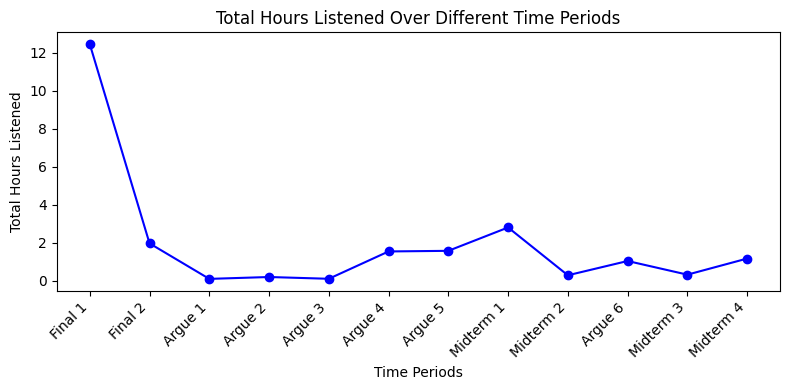

In [ ]:
 #Define time periods
time_periods = [
    {"start_date": "2023-11-16", "end_date": "2023-11-17", "label": "Midterm 1"},
    {"start_date": "2023-11-19", "end_date": "2023-11-20", "label": "Midterm 2"},
    {"start_date": "2023-11-21", "end_date": "2023-11-22", "label": "Midterm 3"},
    {"start_date": "2023-11-30", "end_date": "2023-12-01", "label": "Midterm 4"},
    {"start_date": "2023-09-17", "end_date": "2023-09-18", "label": "Argue 1"},
    {"start_date": "2023-09-23", "end_date": "2023-09-24", "label": "Argue 2"},
    {"start_date": "2023-10-05", "end_date": "2023-10-06", "label": "Argue 3"},
    {"start_date": "2023-10-15", "end_date": "2023-10-16", "label": "Argue 4"},
    {"start_date": "2023-10-30", "end_date": "2023-10-31", "label": "Argue 5"},
    {"start_date": "2023-11-20", "end_date": "2023-11-21", "label": "Argue 6"},
    {"start_date": "2023-01-07", "end_date": "2023-01-20", "label": "Final 1"},
    {"start_date": "2023-06-01", "end_date": "2023-06-11", "label": "Final 2"}
]

# Sort the time_periods based on "start_date"
sorted_time_periods = sorted(time_periods, key=lambda x: x["start_date"])

# Create lists to store labels and corresponding total hours
labels = []
total_hours = []

# Calculate total hours and append to lists
for period in sorted_time_periods:
    hours, _ = calculate_hours_and_top_songs(df, period["start_date"], period["end_date"])
    labels.append(period["label"])
    total_hours.append(hours)

# Plot the data as a line plot
plt.figure(figsize=(8, 4))
plt.plot(labels, total_hours, marker='o', linestyle='-', color='b')
plt.title('Total Hours Listened Over Different Time Periods')
plt.xlabel('Time Periods')
plt.ylabel('Total Hours Listened')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/var/folders/f2/fskslq5j4fbfg51xslpf5h2w0000gn/T/ipykernel_1348/1212658852.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='genre', data=genre_counts, palette='coolwarm')


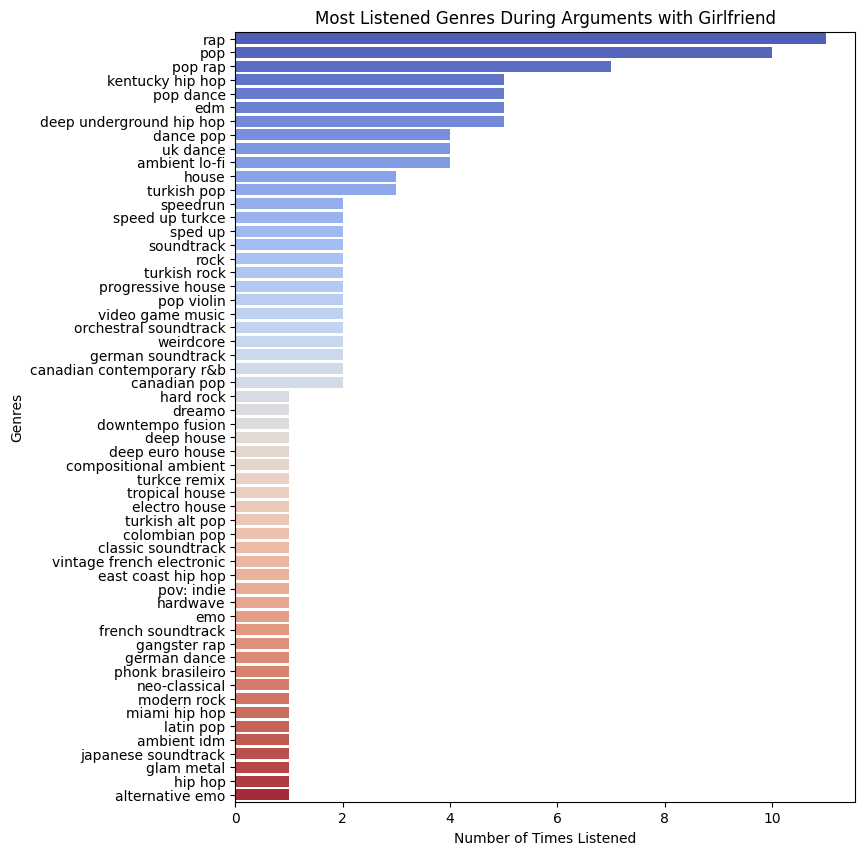

In [137]:
# Combine genre dataframes for each argument
all_argue_genres = pd.concat([genres_argue1, genres_argue2, genres_argue3, genres_argue4, genres_argue5, genres_argue6])

# Group by genre and sum the counts
genre_counts = all_argue_genres.groupby('genre')['count'].sum().reset_index()

# Sort genres by count in descending order
genre_counts = genre_counts.sort_values(by='count', ascending=False)

# Plot the horizontal bar chart with a different color palette
plt.figure(figsize=(8, 10))
sns.barplot(x='count', y='genre', data=genre_counts, palette='coolwarm')
plt.title('Most Listened Genres During Arguments with Girlfriend')
plt.xlabel('Number of Times Listened')
plt.ylabel('Genres')
plt.show()


/var/folders/f2/fskslq5j4fbfg51xslpf5h2w0000gn/T/ipykernel_1348/933830218.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot_midterm = sns.barplot(x='genre', y='count', data=genre_counts_midterm, palette='Set2')


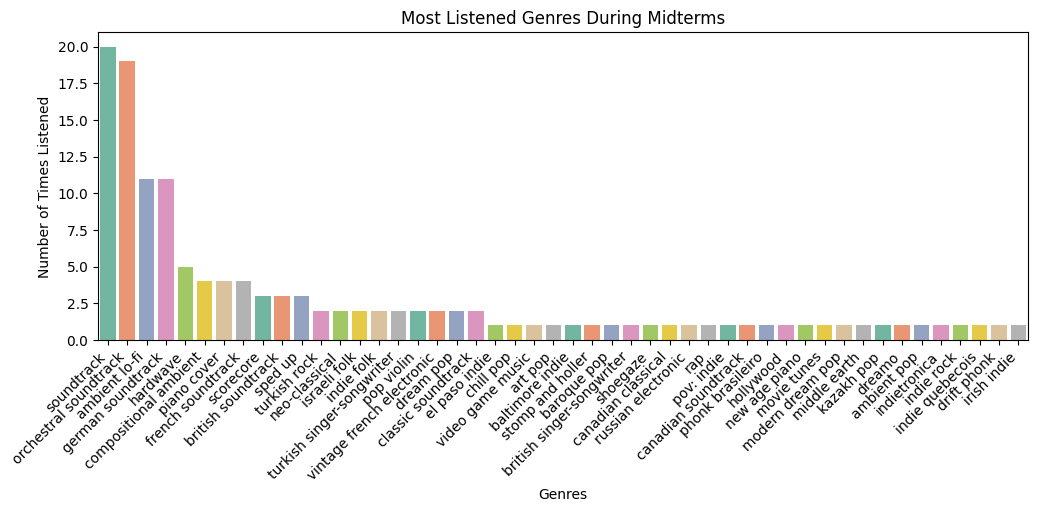

In [138]:
# Combine genre dataframes for each midterm
all_midterm_genres = pd.concat([genres_midterm1, genres_midterm2, genres_midterm3, genres_midterm4])

# Group by genre and sum the counts
genre_counts_midterm = all_midterm_genres.groupby('genre')['count'].sum().reset_index()

# Sort genres by count in descending order
genre_counts_midterm = genre_counts_midterm.sort_values(by='count', ascending=False)

# Plot the vertical bar chart with a different color palette
plt.figure(figsize=(12, 4))
barplot_midterm = sns.barplot(x='genre', y='count', data=genre_counts_midterm, palette='Set2')
plt.title('Most Listened Genres During Midterms')
plt.xlabel('Genres')
plt.ylabel('Number of Times Listened')

# Adjust label orientation
plt.xticks(rotation=45, ha='right')

plt.show()

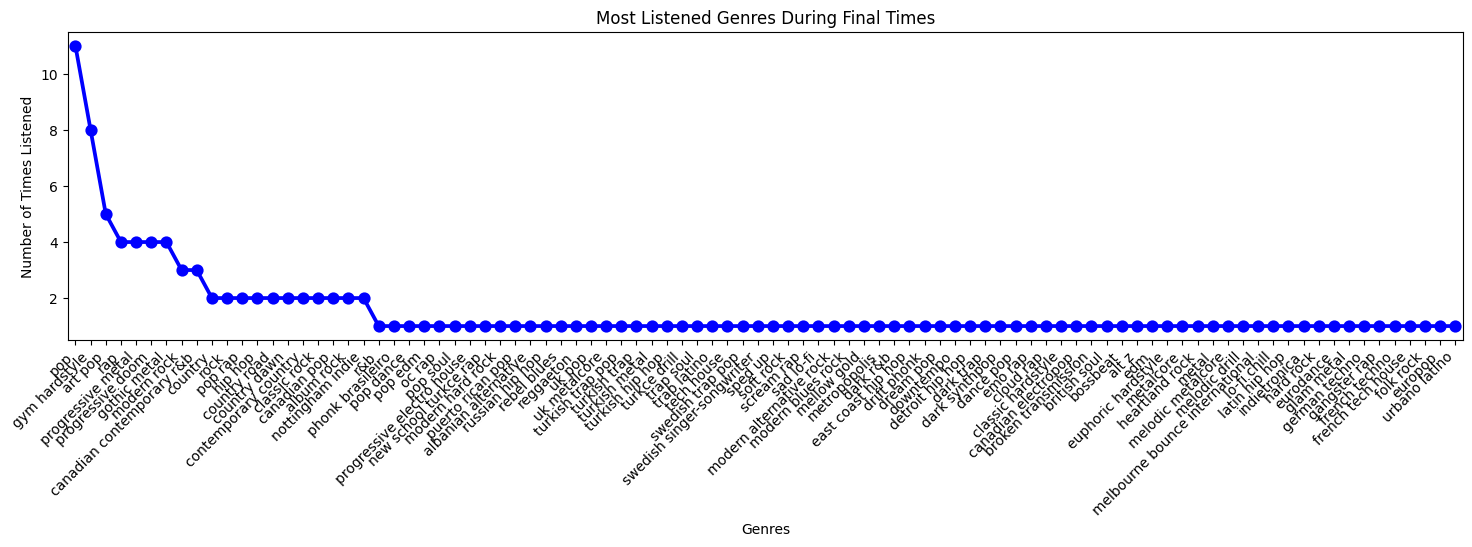

In [140]:
# Combine genre dataframes for each final
all_final_genres = pd.concat([genres_final1, genres_final2])

# Group by genre and sum the counts
genre_counts_final = all_final_genres.groupby('genre')['count'].sum().reset_index()

# Sort genres by count in descending order
genre_counts_final = genre_counts_final.sort_values(by='count', ascending=False)

# Plot the point plot
plt.figure(figsize=(18, 4))
pointplot_final = sns.pointplot(x='genre', y='count', data=genre_counts_final, color='b')
plt.title('Most Listened Genres During Final Times')
plt.xlabel('Genres')
plt.ylabel('Number of Times Listened')

# Adjust label orientation
plt.xticks(rotation=45, ha='right')

plt.show()

/var/folders/f2/fskslq5j4fbfg51xslpf5h2w0000gn/T/ipykernel_1348/3981017690.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_argue_songs['msPlayed'] = top_10_argue_songs['msPlayed'] / (1000 * 60 * 60)


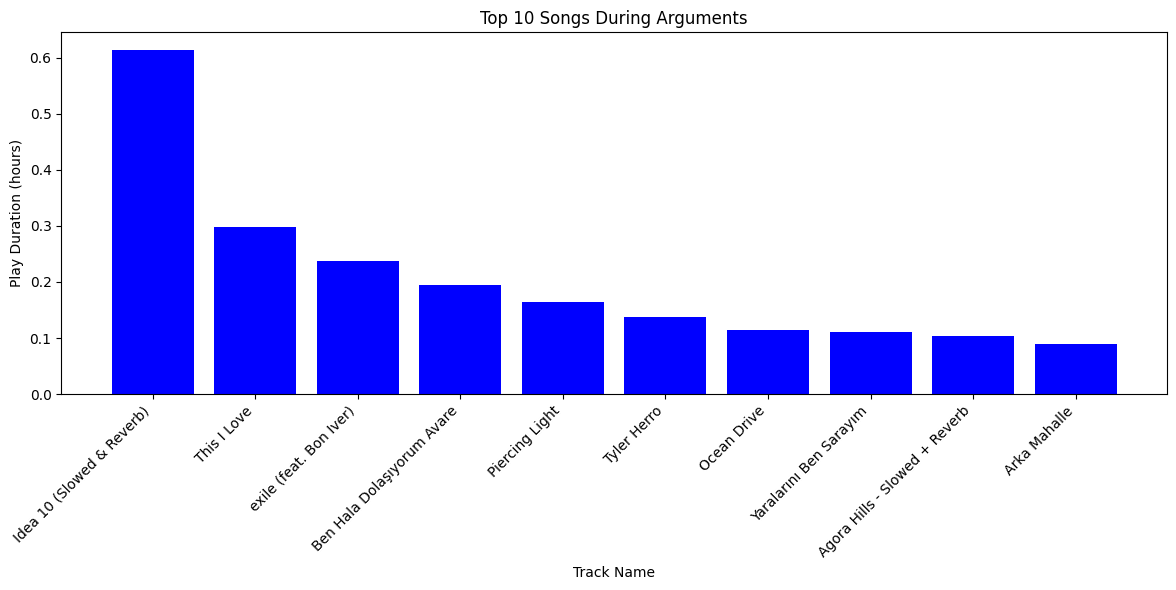

In [151]:
# Concatenate argue songs DataFrames
all_argue_song = pd.concat([argue_songs1, argue_songs2, argue_songs3, argue_songs4, argue_songs5, argue_songs6])

# Group by 'artistName' and 'trackName', and sum the 'msPlayed'
grouped_argue_songs = all_argue_song.groupby(['artistName', 'trackName'], as_index=False)['msPlayed'].sum()

# Sort the DataFrame by 'msPlayed' in descending order
sorted_argue_songs = grouped_argue_songs.sort_values(by='msPlayed', ascending=False)

# Select the top 10 songs
top_10_argue_songs = sorted_argue_songs.head(10)

# Convert milliseconds to hours
top_10_argue_songs['msPlayed'] = top_10_argue_songs['msPlayed'] / (1000 * 60 * 60)

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_10_argue_songs['trackName'], top_10_argue_songs['msPlayed'], color='blue')
plt.xlabel('Track Name')
plt.ylabel('Play Duration (hours)')
plt.title('Top 10 Songs During Arguments')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

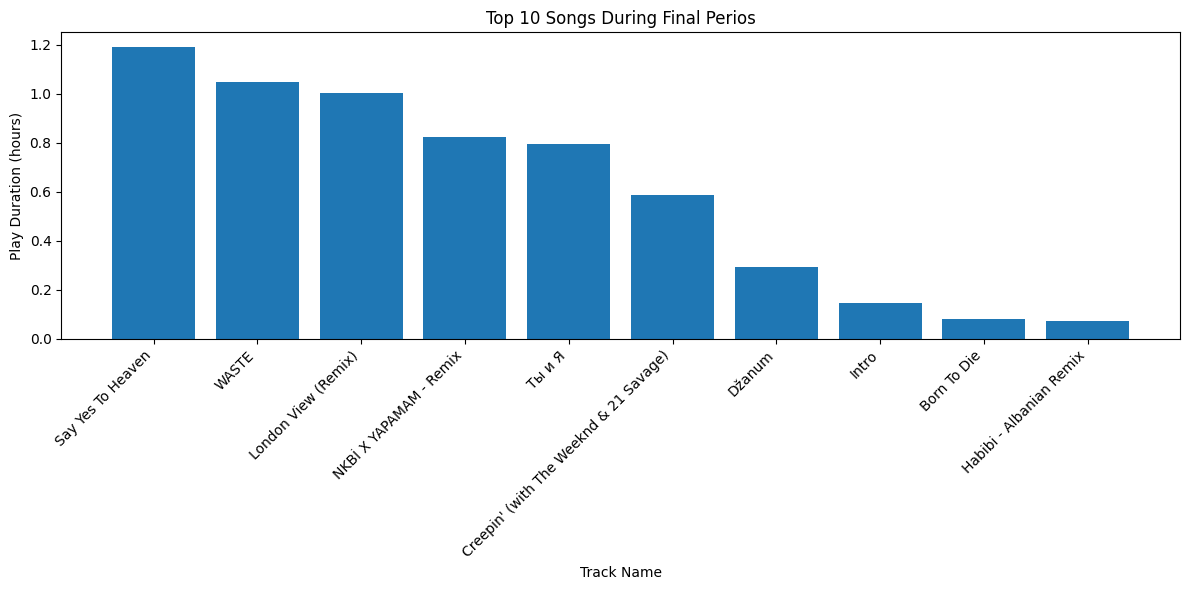

In [156]:
# Concatenate argue songs DataFrames
all_argue_song = pd.concat([final_songs1,final_songs2 ])

# Group by 'artistName' and 'trackName', and sum the 'msPlayed'
grouped_final_songs = all_argue_song.groupby(['artistName', 'trackName'], as_index=False)['msPlayed'].sum()

# Sort the DataFrame by 'msPlayed' in descending order
sorted_final_songs = grouped_final_songs.sort_values(by='msPlayed', ascending=False)

# Select the top 10 songs
top_10_final_songs = sorted_final_songs.head(10)

# Convert milliseconds to hours
top_10_final_songs['msPlayed'] = top_10_final_songs['msPlayed'] / (1000 * 60 * 60)

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_10_final_songs['trackName'], top_10_final_songs['msPlayed'])
plt.xlabel('Track Name')
plt.ylabel('Play Duration (hours)')
plt.title('Top 10 Songs During Final Perios')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

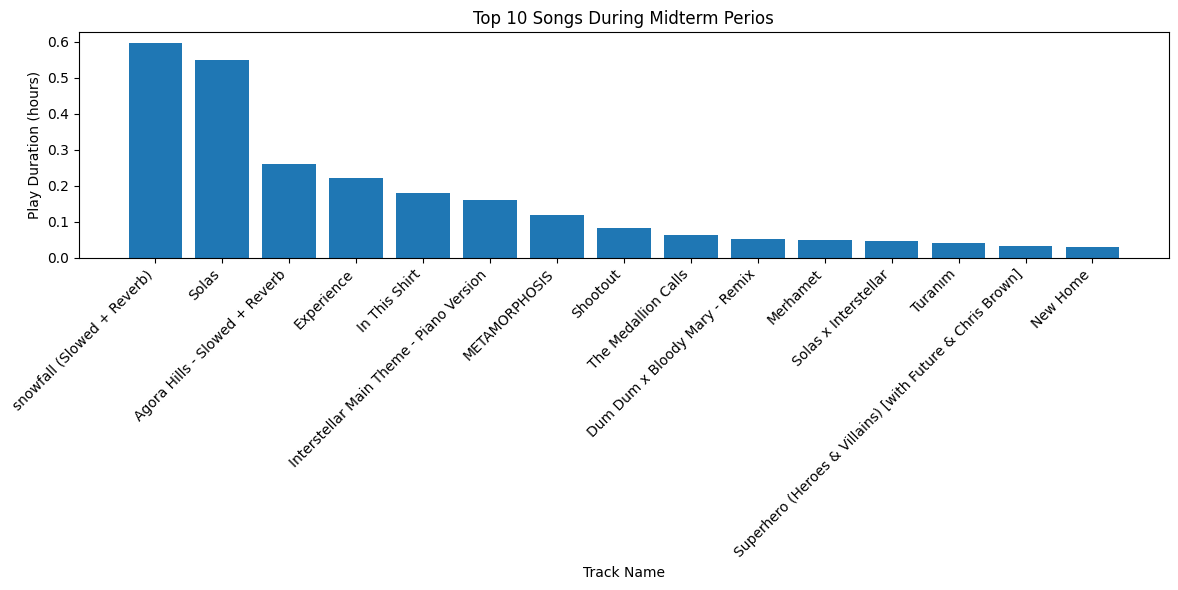

In [158]:
# Concatenate argue songs DataFrames
all_midterm_song = pd.concat([topsongs_midterm1,topsongs_midterm2,topsongs_midterm3,topsongs_midterm4 ])

# Group by 'artistName' and 'trackName', and sum the 'msPlayed'
grouped_midterm_songs = all_midterm_song.groupby(['artistName', 'trackName'], as_index=False)['msPlayed'].sum()

# Sort the DataFrame by 'msPlayed' in descending order
sorted_midterm_songs = grouped_midterm_songs.sort_values(by='msPlayed', ascending=False)

# Select the top 10 songs
top_10_midterm_songs = sorted_midterm_songs.head(10)

# Convert milliseconds to hours
sorted_midterm_songs['msPlayed'] = sorted_midterm_songs['msPlayed'] / (1000 * 60 * 60)

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(sorted_midterm_songs['trackName'], sorted_midterm_songs['msPlayed'])
plt.xlabel('Track Name')
plt.ylabel('Play Duration (hours)')
plt.title('Top 10 Songs During Midterm Perios')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()